<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/decision_tree_regression/decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [22]:
# X = [[Suhu], [Hari dalam Seminggu (0=Kerja, 1=Akhir Pekan)]]
# y = [Penjualan Es Krim]

X = [
    [18, 0],  # Suhu 18C, Hari Kerja
    [20, 0],  # Suhu 20C, Hari Kerja
    [22, 1],  # Suhu 22C, Akhir Pekan
    [25, 1],  # Suhu 25C, Akhir Pekan
    [23, 0],  # Suhu 23C, Hari Kerja
    [15, 0],  # Suhu 15C, Hari Kerja
    [28, 1],  # Suhu 28C, Akhir Pekan
    [21, 1],  # Suhu 21C, Akhir Pekan
    [17, 0],  # Suhu 17C, Hari Kerja
    [30, 1]   # Suhu 30C, Akhir Pekan
]

y = [
    50,   # Penjualan saat 18C, Hari Kerja
    65,   # Penjualan saat 20C, Hari Kerja
    90,   # Penjualan saat 22C, Akhir Pekan
    120,  # Penjualan saat 25C, Akhir Pekan
    80,   # Penjualan saat 23C, Hari Kerja
    30,   # Penjualan saat 15C, Hari Kerja
    150,  # Penjualan saat 28C, Akhir Pekan
    75,   # Penjualan saat 21C, Akhir Pekan
    40,   # Penjualan saat 17C, Hari Kerja
    180   # Penjualan saat 30C, Akhir Pekan
]

feature_names = ['Suhu', 'Hari_dalam_Seminggu']
X_df = pd.DataFrame(X, columns=feature_names)
y_series = pd.Series(y, name='Penjualan_Es_Krim')

print("Data X (Fitur):")
print(X_df)
print("\nData y (Target):")
print(y_series)



Data X (Fitur):
   Suhu  Hari_dalam_Seminggu
0    18                    0
1    20                    0
2    22                    1
3    25                    1
4    23                    0
5    15                    0
6    28                    1
7    21                    1
8    17                    0
9    30                    1

Data y (Target):
0     50
1     65
2     90
3    120
4     80
5     30
6    150
7     75
8     40
9    180
Name: Penjualan_Es_Krim, dtype: int64


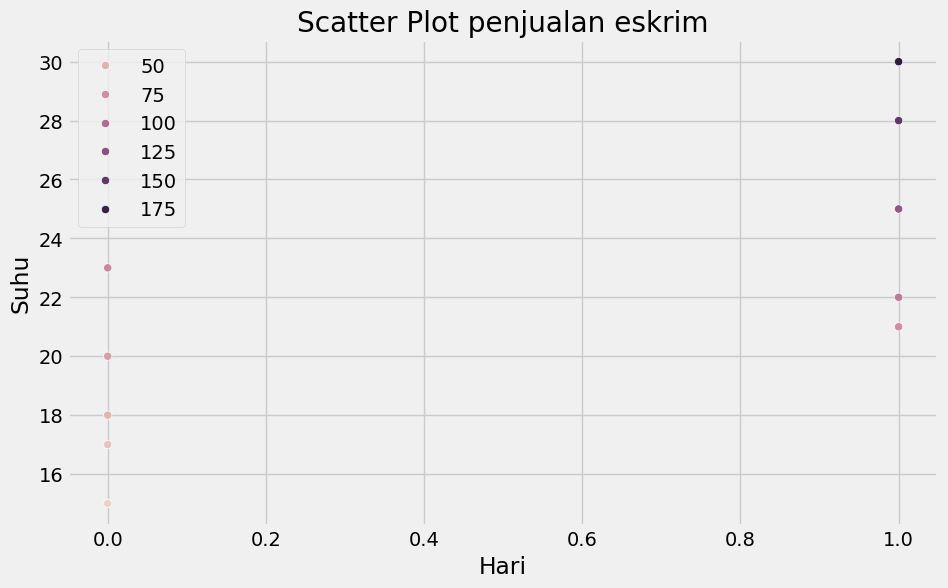

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=[x[1] for x in X], y=[x[0] for x in X], hue=y)
plt.xlabel("Hari")
plt.ylabel("Suhu")
plt.title("Scatter Plot penjualan eskrim")
plt.show()


In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X, y)

print("\nMelakukan Prediksi:")
# Prediksi untuk hari kerja dengan suhu 20C
prediksi_baru_1 = model.predict([[20, 0]])
print(f"Prediksi penjualan untuk Suhu 20C, Hari Kerja: {prediksi_baru_1[0]:.2f} unit")

# Prediksi untuk akhir pekan dengan suhu 27C
prediksi_baru_2 = model.predict([[27, 1]])
print(f"Prediksi penjualan untuk Suhu 27C, Akhir Pekan: {prediksi_baru_2[0]:.2f} unit")


Melakukan Prediksi:
Prediksi penjualan untuk Suhu 20C, Hari Kerja: 70.00 unit
Prediksi penjualan untuk Suhu 27C, Akhir Pekan: 150.00 unit


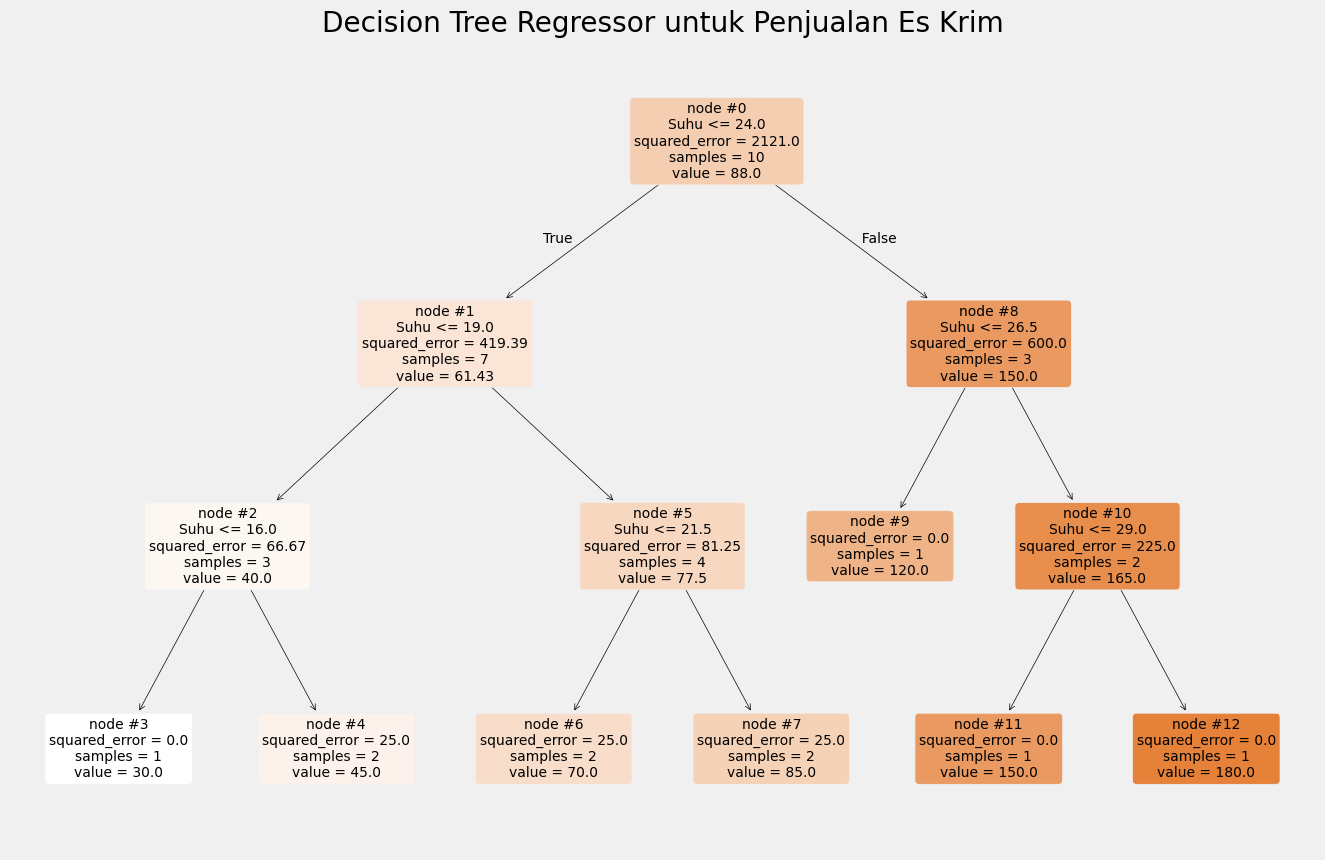

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=True,  # Menampilkan impurity (squared_error untuk regresi)
          node_ids=True,  # Menampilkan ID node
          precision=2)    # Pembulatan desimal
plt.title("Decision Tree Regressor untuk Penjualan Es Krim")
plt.show()

In [27]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2_score(y, y_pred)
print("Akurasi:", r2_score(y, y_pred))

Akurasi: 0.9929278642149929


#menggukan data yang tersedia di sklearn

In [64]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing # Menggunakan California Housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = fetch_california_housing(as_frame=True)
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor(random_state=42, max_depth=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Akurasi, {r2_score(y_test, y_pred):.2f}%')
print("MSE:", mean_squared_error(y_test, y_pred))


Akurasi, 0.67%
MSE: 0.4293352518640058


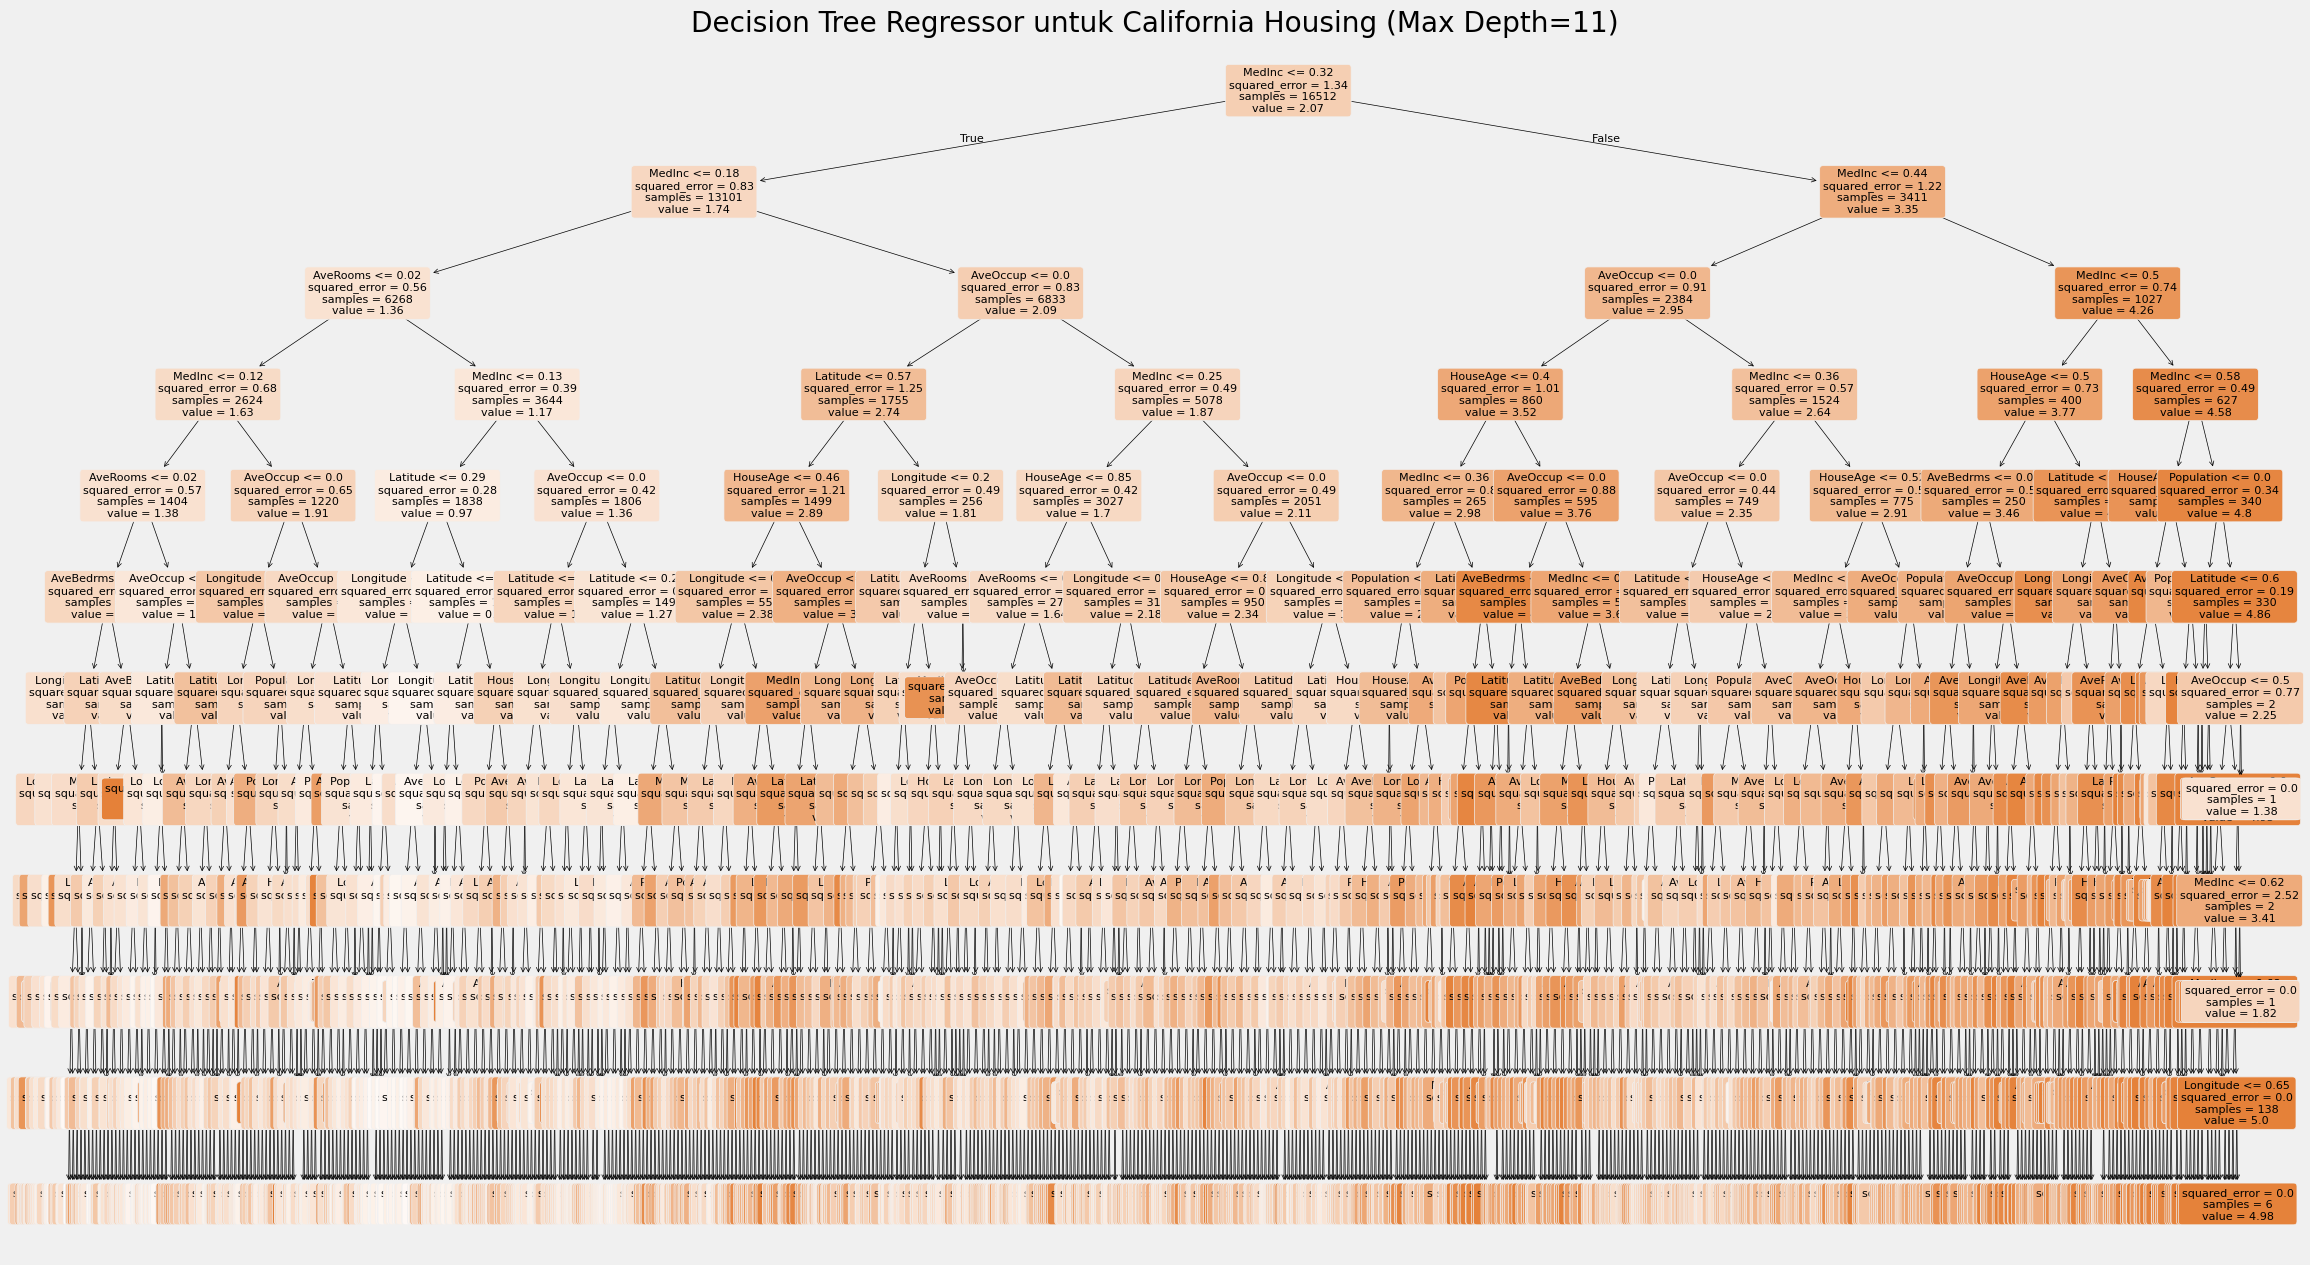

In [54]:
plt.figure(figsize=(25, 15))
plot_tree(model,
          feature_names=df.feature_names, # Use feature names from the original dataset
          filled=True,
          rounded=True,
          fontsize=8,
          impurity=True,
          precision=2)
plt.title(f"Decision Tree Regressor untuk California Housing (Max Depth={model.max_depth})") # Corrected model variable name
plt.show()

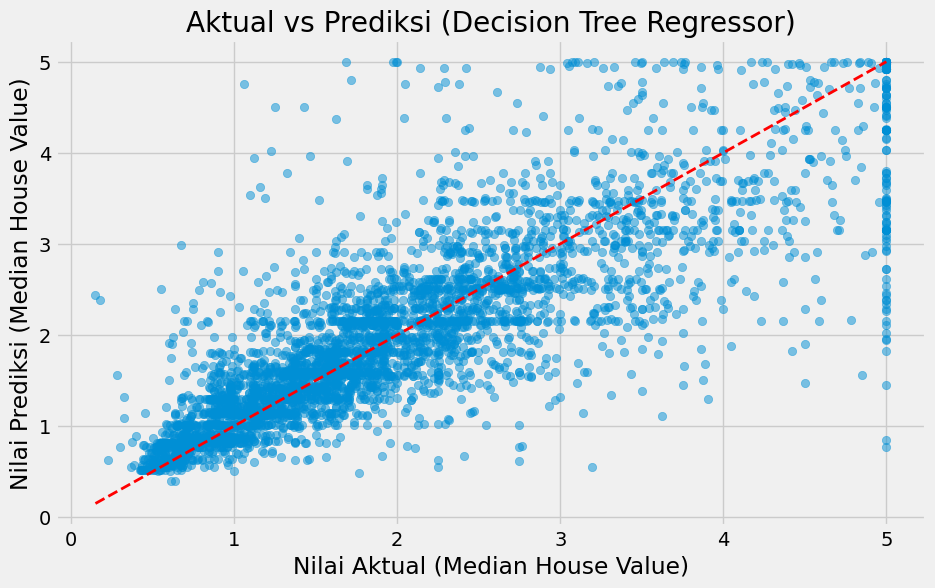

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Garis y=x
plt.xlabel("Nilai Aktual (Median House Value)")
plt.ylabel("Nilai Prediksi (Median House Value)")
plt.title("Aktual vs Prediksi (Decision Tree Regressor)")
plt.grid(True)
plt.show()